In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# 内容

LSTMを使って時系列データの予測をするためのサンプル．  
LSTMをどんなふうに実装すればいいのかを試すためだけのサンプル．  
ここではsin波のダミーデータを作成し，予測を行う．

## 参考URL

- [初心者のRNN(LSTM) | Kerasで試してみる](https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf)


In [2]:
# sin波
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()

In [3]:
# 順番に並んだ25個のデータから，26番目のデータの数値を予測する
def make_dataset(low_data):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


# g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)

In [4]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 3s 17ms/sample - loss: 0.5294 - val_loss: 0.1265
Epoch 2/100
158/158 [==============================] - 0s 937us/sample - loss: 0.3335 - val_loss: 0.0374
Epoch 3/100
158/158 [==============================] - 0s 987us/sample - loss: 0.1921 - val_loss: 0.0898
Epoch 4/100
158/158 [==============================] - 0s 1ms/sample - loss: 0.1276 - val_loss: 0.2360
Epoch 5/100
158/158 [==============================] - 0s 937us/sample - loss: 0.1324 - val_loss: 0.1798
Epoch 6/100
158/158 [==============================] - 0s 943us/sample - loss: 0.0914 - val_loss: 0.0811
Epoch 7/100
158/158 [==============================] - 0s 956us/sample - loss: 0.0545 - val_loss: 0.0301
Epoch 8/100
158/158 [==============================] - 0s 1ms/sample - loss: 0.0445 - val_loss: 0.0140
Epoch 9/100
158/158 [==============================] - 0s 1ms/sample - loss: 0.0460 - val_loss: 0.0107
Epoch 10/100
158/

In [6]:
# 予測
predicted = model.predict(g)
print(predicted)

[[ 9.70480978e-01]
 [ 9.71648514e-01]
 [ 9.67983425e-01]
 [ 9.65545654e-01]
 [ 9.63131964e-01]
 [ 9.58518624e-01]
 [ 9.50005054e-01]
 [ 9.33525801e-01]
 [ 9.03849959e-01]
 [ 8.68687868e-01]
 [ 8.23497951e-01]
 [ 7.69789994e-01]
 [ 7.11503804e-01]
 [ 6.52350366e-01]
 [ 5.97049594e-01]
 [ 5.49052238e-01]
 [ 4.97922748e-01]
 [ 4.43728209e-01]
 [ 3.94712359e-01]
 [ 3.44234198e-01]
 [ 2.92452812e-01]
 [ 2.42950588e-01]
 [ 1.86700284e-01]
 [ 1.19589925e-01]
 [ 4.77123223e-02]
 [-2.21731011e-02]
 [-8.56490433e-02]
 [-1.48041666e-01]
 [-2.13127509e-01]
 [-2.74485707e-01]
 [-3.29538614e-01]
 [-3.86691839e-01]
 [-4.44083840e-01]
 [-4.98932481e-01]
 [-5.54284155e-01]
 [-6.08099282e-01]
 [-6.57008231e-01]
 [-7.05722988e-01]
 [-7.50016510e-01]
 [-7.86863148e-01]
 [-8.21594059e-01]
 [-8.51135910e-01]
 [-8.77237976e-01]
 [-9.05982673e-01]
 [-9.32774425e-01]
 [-9.58440363e-01]
 [-9.80480909e-01]
 [-9.95412588e-01]
 [-1.00257778e+00]
 [-1.00067520e+00]
 [-9.93071377e-01]
 [-9.78678763e-01]
 [-9.6257990

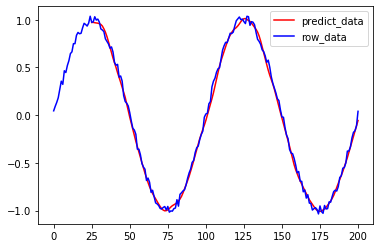

In [7]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()